In [1]:
import pandas as pd
from pandas import read_csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/VickySav/Datasets/refs/heads/main/adult.csv')
data.sample(10)

# mengimport datasets ke pandas

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
34267,55,Private,181220,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
47012,68,Private,211162,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
43785,51,Local-gov,96190,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
2208,45,Private,195918,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
10642,40,Private,91355,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,United-States,<=50K
24660,61,Private,160037,7th-8th,4,Divorced,Other-service,Not-in-family,White,Male,0,0,35,United-States,<=50K
7030,22,Private,341760,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
25310,47,Private,254367,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
608,36,Private,86143,Assoc-voc,11,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
45575,33,State-gov,31703,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K


In [3]:
data.info()

#total ada sebanyal 48842 data dengan total kolom 15 dan tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.drop(['fnlwgt', 'education'], axis=1, inplace=True)
data.head()

# Menghapus kolom fnlwgt dan education karena tidak diperlukan, kolom education sama dengan educational-num

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.replace('?', np.nan, inplace=True)
data.isnull().sum()

# Banyak data yang nilainya kosong

,0
age,0
workclass,2799
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0
capital-gain,0
capital-loss,0


In [6]:
for col in ['workclass', 'occupation', 'native-country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum()

# mengisi data-data yang kosong dengan modus di setiap kolom

<ipython-input-6-45009f4df99b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


,0
age,0
workclass,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0
capital-gain,0
capital-loss,0


In [7]:
data.describe()
# Describe menampilkan count, mean, standar deviation, min, max, 25%, 50%, dan 75% dari atribut yang berupa angka dari kolom2 numerik dataset ini.

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


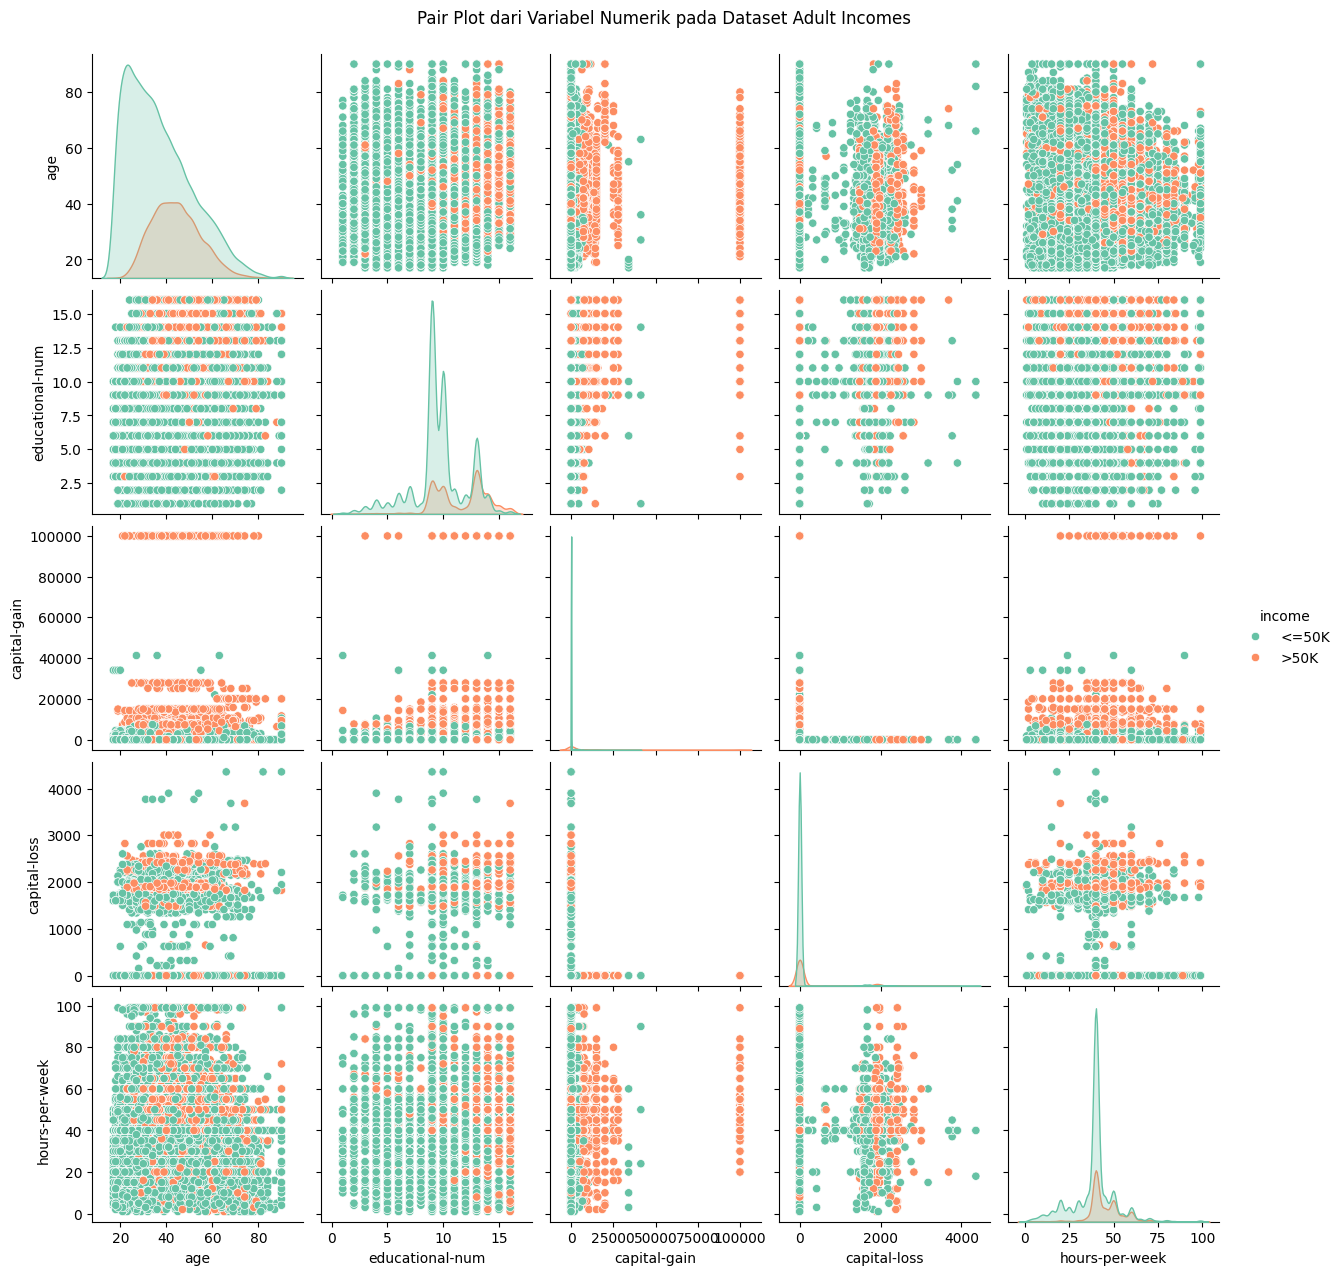

In [8]:
sns.pairplot(data, hue='income', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot dari Variabel Numerik pada Dataset Adult Incomes', y=1.02)
plt.show()

# Semakin tinggi educational num seseorang maka kemungkinan mereka memiliki pendapatan >50k lebih besar.
# Semakin besar capital gainnya, incomenya juga >50k

<ipython-input-9-1874384018b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=data, palette="Set2")


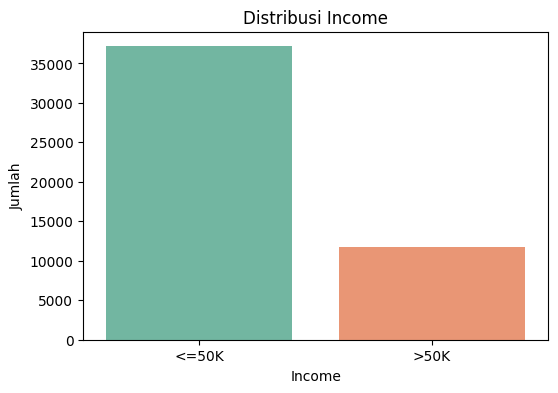

In [9]:
# Visualiasi
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=data, palette="Set2")
plt.title('Distribusi Income')
plt.xlabel('Income')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan jumlah distribusi Income ternyata jumlah orang yang memiliki income <=50k jauh lebih banyak dari orang dengan income >50k

In [10]:
label_encoder = LabelEncoder()

columns_to_encode = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'native-country',
    'income'
]

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

# Mengubah seluruh nilai pada kolom diagnosis yang awalnya categorical menajadi numeric.

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,2,1,0,0,40,38,0
1,38,3,9,2,4,0,4,1,0,0,50,38,0
2,28,1,12,2,10,0,4,1,0,0,40,38,1
3,44,3,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,10,4,9,3,4,0,0,0,30,38,0


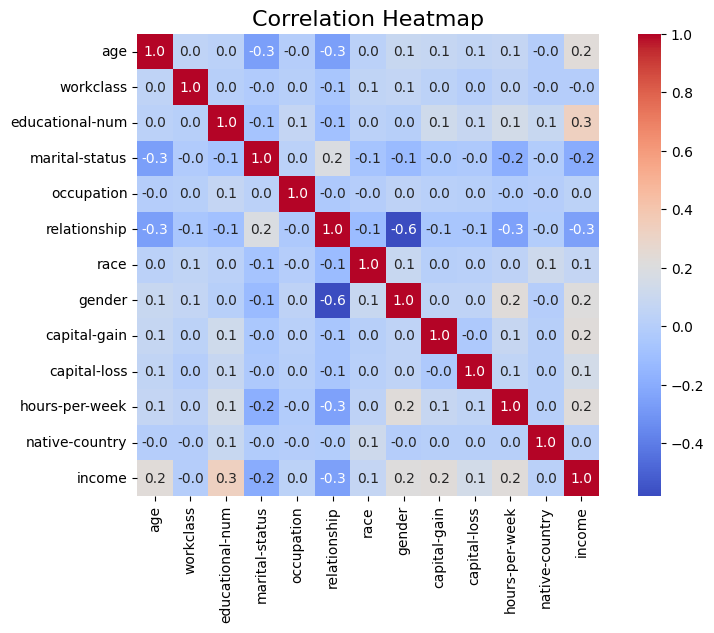

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Variabel educational-num memiliki korelasi 0.3 dengan income. Yang menandakan bahwa educational bisa mempengaruhi income seseorang.

In [12]:
X = data.drop(['income'], axis = 1)
y = data['income']

# X digunakan untuk membuat prediksi, y adalah target atau output yang ingin diprediksi.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Membagi dataset X dan y menjadi training dan testing data dengan pembagian 80% untuk training dan 20% untuk testing

X_train.shape, X_test.shape
# Menampilkan ukuran atau dimensi dari data latih (X_train) dan data uji (X_test) dalam bentuk tuple.

((39073, 12), (9769, 12))

Decision Tree

1. Entropy

In [14]:
ent = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
ent.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [15]:
y_pred_ent = ent.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria entropy.

print(f'Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_ent):.4f}')
# Menampilkan akurasi dari kriteria entropy berdasarkan y_test dan y_pred_ent.

Model accuracy score with criterion entropy: 0.8449


In [16]:
y_train_ent = ent.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_ent)
training_acc = accuracy_score(y_train, y_train_ent)

print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_ent, y_train, dan y_train_ent.
# Selisih antara skor set pelatihan (0.8384) dan skor set pengujian (0.8449) adalah 0.0065 ini menunjukkan bahwa model mampu menggeneralisasi dengan baik.

Training set score: 0.8384
Test set score: 0.8449


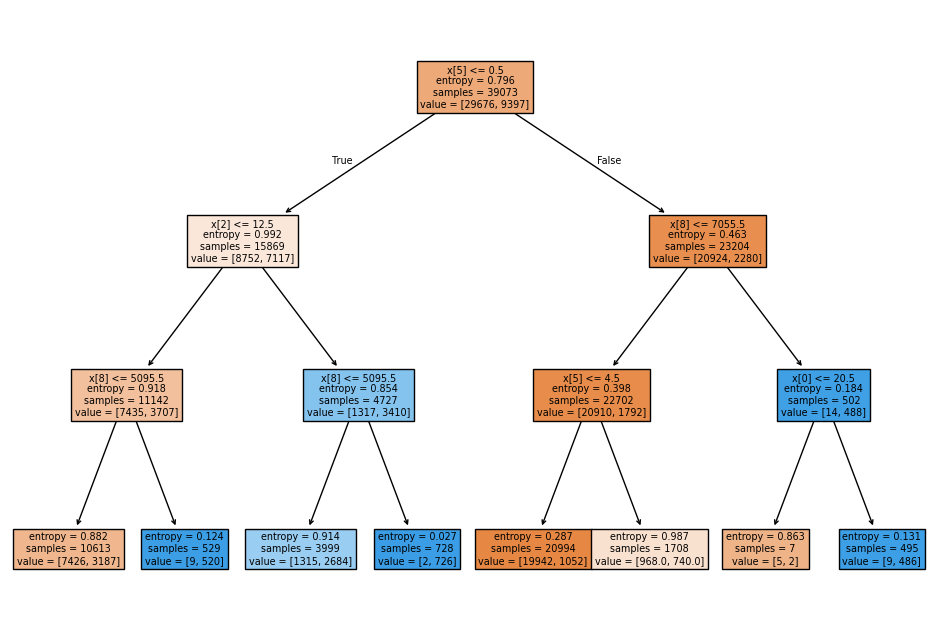

In [17]:
plt.figure(figsize=(12, 8))
tree.plot_tree(ent, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

2. Gini Index

In [18]:
gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
gini.fit(X_train, y_train)
# Membuat model Decision Tree dengan menggunakan kriteria gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
y_pred_gini = gini.predict(X_test)
# Untuk menghasilkan prediksi menggunakan kriteria gini.

print(f'Model accuracy score with criterion gini: {accuracy_score(y_test, y_pred_gini):.4f}')
# Menampilkan akurasi dari kriteria gini berdasarkan y_test dan y_pred_gini.

Model accuracy score with criterion gini: 0.8449


In [20]:
y_train_gini = gini.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_gini)
training_acc = accuracy_score(y_train, y_train_gini)

print(f"Training set score: {training_acc:.4f}")
print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_gini, y_train, dan y_train_gini.
# Selisih antara skor set pelatihan (0.8384) dan skor set pengujian (0.8449) adalah 0.0065 ini menunjukkan bahwa model mampu menggeneralisasi dengan baik.

Training set score: 0.8384
Test set score: 0.8449


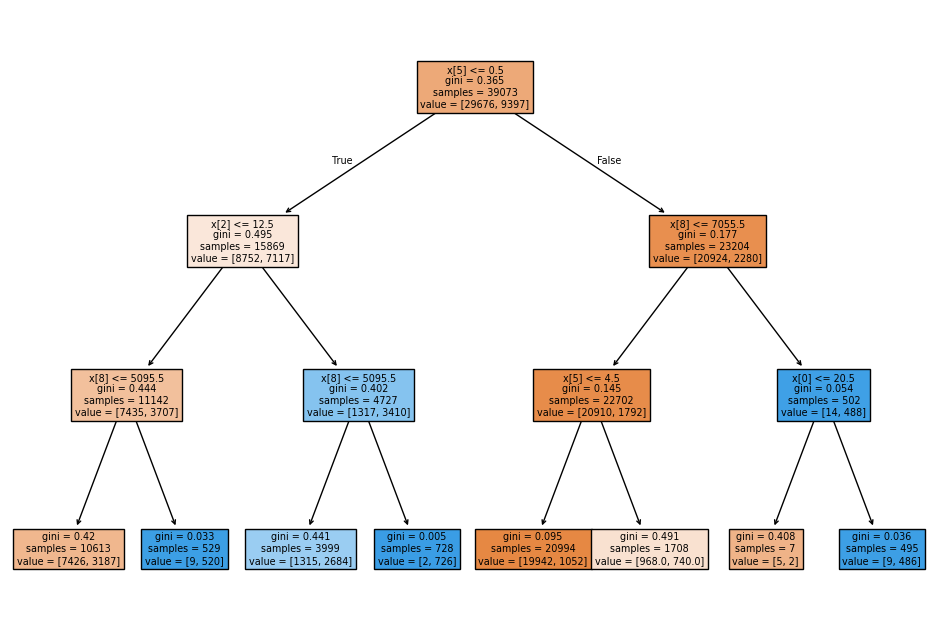

In [21]:
plt.figure(figsize=(12, 8))
tree.plot_tree(gini, filled=True)
plt.show()

# Menampilkan visualisasi dari Decision Tree menggunakan plot_tree dari sklearn.

Naive Bayes

In [22]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Membuat model dengan menggunakan Naive Bayes.

GaussianNB()

In [23]:
y_pred_nb = nb.predict(X_test)
# Untuk menghasilkan prediksi menggunakan Naive Bayes.

In [24]:
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari Naive Bayes berdasarkan y_test dan y_pred_nb.

Accuracy Score: 0.8041


In [25]:
y_train_nb = nb.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_nb)
training_acc = accuracy_score(y_train, y_train_nb)

print(f"Training set score: {training_acc:.4f}")

print(f"Test set score: {test_acc:.4f}")

# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_nb, y_train, dan y_train_nb.
# Selisih sekitar 0.0053 menunjukkan bahwa model tidak mengalami overfitting dan generalisasi yang baik.

Training set score: 0.7991
Test set score: 0.8041


KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

k = 21 # Jumlah tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

# Untuk menghasilkan prediksi menggunakan KNN.

KNeighborsClassifier(n_neighbors=21)

In [63]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy:.4f}")
# Menampilkan akurasi dari KNN berdasarkan y_test dan y_pred_knn.

Accuracy Score: 0.8560


In [64]:
y_train_knn = nb.predict(X_train)

test_acc = accuracy_score(y_test, y_pred_knn)
training_acc = accuracy_score(y_train, y_train_knn)

print(f"Training set score: {training_acc:.4f}")

print(f"Test set score: {test_acc:.4f}")
# Menampilkan training dan test skor berdasarkan akurasi yang dihitung menggunakan y_test, y_pred_knn, y_train, dan y_train_knn.
# Selisih antara skor set pelatihan (0.7991) dan skor set pengujian (0.8560) adalah 0.0569.

Training set score: 0.7991
Test set score: 0.8560


In [65]:
cm_entropy = confusion_matrix(y_test, y_pred_ent)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix Entropy:")
print(cm_entropy)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)
print("\nConfusion Matrix KNN:")
print(cm_knn)


# Menampilkan confusion matrix dari kriteria entropy, kriteria gini index, Naive Bayes, dan KNN.

Confusion Matrix Entropy:
[[7136  343]
 [1172 1118]]

Confusion Matrix Gini:
[[7136  343]
 [1172 1118]]

Confusion Matrix Naive Bayes:
[[7118  361]
 [1553  737]]

Confusion Matrix KNN:
[[6969  510]
 [ 897 1393]]


In [66]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_ent))

print("\nClassification Report Gini")
print(classification_report(y_test, y_pred_gini))

print("\nClassification Report Naive Bayes")
print(classification_report(y_test, y_pred_nb))

print("\nClassification Report KNN")
print(classification_report(y_test, y_pred_knn))

# Menampilkan classification report dari kriteria entropy, kriteria gini index, Naive Bayes, dan KNN.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769


Classification Report Gini
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769


Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.67      0.32      0.44      2290

    accuracy                           0.80      9769
   macro avg       0.75      0.64  

In [31]:
# Kedua decision tree Entropy dan Gini Index menunjukkan kinerja yang sama, dengan skor F1 tinggi pada kelas 0 tetapi lebih rendah pada kelas 1 karena recall yang rendah (0.49). Ini menunjukkan bahwa model kurang optimal dalam mengklasifikasikan kelas 1.
# KNN adalah model terbaik dalam hal akurasi keseluruhan (0.86) dan F1-score untuk kedua kelas, terutama karena memiliki recall yang lebih baik untuk kelas 1.
# Naive Bayes menunjukkan performa yang lebih rendah, terutama dalam mengenali kelas 1.